__Background:__ The purpose of this python homework is to explore some path properties of the simple symmetric random walk.

Given a <b>simple symmetric random walk</b> $(S_n)_{n\geq 0}$ with $S_0 =0$, and a positive integer $N$, we define the following related random variables:

* The time of the **last** visit to $0$ before time $2N$: 

$$L_{2N} = \max \{ 0 \leq n \leq  2N : S_n = 0 \}.$$

* The time when the random walk **reaches its maximum** value between time $0$ and $2N$: 

$$M_{2N} = \operatorname{argmax} \{ S_n : 0 \leq n \leq 2N \}.$$

Note that both $L_{2N}$ and $M_{2N}$ are discrete random variables taking values between $0$ and $2N$.

Our goal is to explore the **distribution** of $L_{2N}$ and $M_{2N}$. Throughout we will use $N=250$ for illustration.

As usual, we start with loading some packages:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import arcsine
np.random.seed(160)

## Problem 1 (2 Points)

1. Write a function <tt>randomWalk(...)</tt> which simulates one <i>path</i> (or <i>trajectory</i>) of a simple symmetric random walk with 2N time steps (i.e. from 0,1,2,...,2N) starting at $S_0=0$.

Input: 
* <tt>lengthOfRandomWalk = 2N</tt> 

Output:
* <tt>samplePath</tt>: Array of length 2N+1 with the entire path of the random walk on 0,1,2,...,2N


In [2]:
def randomWalk(lengthOfRandomWalk):
    S_i = 0
    samplePath = [S_i]
    for i in range(lengthOfRandomWalk):
        S_i += np.random.choice([-1,1])
        samplePath.append(S_i)
    return samplePath

In [3]:
print(randomWalk(50))

[0, -1, -2, -1, -2, -1, 0, -1, -2, -1, -2, -3, -2, -3, -4, -5, -4, -3, -2, -1, 0, 1, 2, 1, 2, 1, 2, 3, 2, 3, 2, 3, 4, 3, 4, 3, 2, 3, 4, 3, 4, 5, 6, 7, 8, 7, 8, 7, 8, 7, 8]


2. Plot the trajectory of the random walk you simulated in 1.)

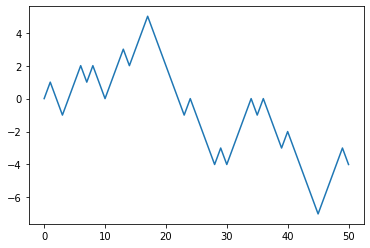

In [4]:
plt.plot(np.linspace(0,50,num=51),randomWalk(50))

## Problem 2 (4 points)

Write a function which takes a path (= realization) of the random walk as an input and then evaluates the value of $L_{2N}$ defined above on that path.

__1. Function:__ <tt>TimeOfLastVisitOfZero(...)</tt>

Input: 
* <tt>path</tt>: Realization of the random walk from the function <tt>randomWalk(2N)</tt>  (Array of length $2N+1$)

Output:
* <tt>result</tt>: Realization of the random variable $L_{2N}$ (scalar)

In [5]:
def TimeOfLastVisitOfZero(path):  
    return np.amax(np.where(np.array(path)==0))

In [6]:
path = randomWalk(20)
print(path)
TimeOfLastVisitOfZero(path)

[0, 1, 2, 3, 2, 3, 2, 3, 4, 5, 4, 5, 6, 5, 4, 5, 6, 5, 6, 5, 6]


0

__2.__ Write a function <tt>sampleLastVisit</tt> that samples $M$ paths of the random walk, runs TimeOfLastVisitOfZero on each of them and returns an Array of length M of the resulting empirical distribution of $L_{2N}$.

It turns out that in fact one can in fact **analytically** find the limiting distribution of $L_{2N}$ in the limit $N \to \infty$. This is given  by the arcsine distribution and looks like this (below you should get the same *shape*, but different x- and y-axis scaling).

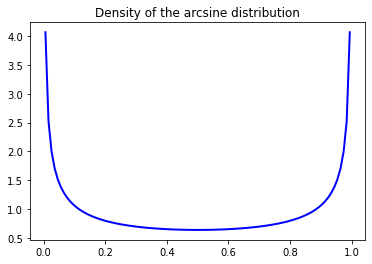

In [7]:
## A PLOT OF THE ARCSINE DENSITY
x = np.linspace(arcsine.ppf(0.05), arcsine.ppf(0.95), 100)
plt.title("Density of the arcsine distribution")
plt.plot(x, arcsine.pdf(x), linewidth=2, color='b')
plt.show()

In [8]:
def sampleLastVisit(N,M):
    empirical_l_2n = []
    for i in range(M):
        walk = randomWalk(N)
        l_2n = TimeOfLastVisitOfZero(walk)
        empirical_l_2n.append(l_2n)
    return empirical_l_2n

Run your <tt>sampleLastVisit</tt> function with N=250 and $M=10,000$ paths and plot the histogram of $L_{2N}$.

No handles with labels found to put in legend.


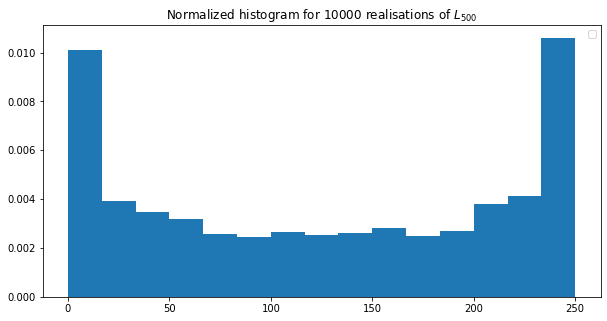

In [9]:
N = 250
M = 10000

c = sampleLastVisit(N,M)

plt.figure(figsize=(10,5))
plt.title("Normalized histogram for 10000 realisations of $L_{500}$")
plt.hist(c, bins='auto', density='True')
plt.legend()
plt.show()

## Problem 3 (4pt)

We repeat the above steps but now for the random variable $M_{2N}$, the time when the maximum is reached. Write a function that takes a random walk path of length $2N$ and evaluates the value of $M_{2N}$ on it.

__1. Function:__ <tt>timeHitMax(...)</tt>

Input: 
* <tt>path</tt>: Realization of the random walk from the function <tt>randomWalk(2N)</tt> (Array of length $2N+1$)

Output:
* <tt>result</tt>: Realization of the random variable $M_{2N}$ (scalar)

In [10]:
def timeHitMax(randomWalk):
    return np.argmax(randomWalk)

In [11]:
path = randomWalk(20)
print(path)
timeHitMax(path)

[0, -1, -2, -3, -2, -1, -2, -1, -2, -1, -2, -1, -2, -1, -2, -1, 0, -1, -2, -1, 0]


0

In [12]:
def sampleMaxTime(N,M):
    empirical_m_2n = []
    for i in range(M):
        walk = randomWalk(N)
        m_2n = timeHitMax(walk)
        empirical_m_2n.append(m_2n)
    return empirical_m_2n

__2.__ Write a function <tt>sampleMaxTime</tt> that samples $M$ paths of the random walk, runs timeHitMax on each of them and returns an Array of length M that contains the resulting empirical distribution of $M_{2N}$.

Even more amazingly, it turns out the limiting distribution of $M_{2N}$ is again the arcsine distribution, i.e. the histograms of $M_{2N}$ and $L_{2N}$ should look very similar! 


Run your <tt>sampleMaxTime</tt> function with N=250 and M=10,000 simulations and plot the histogram of $M_{2N}$. Modify the plotting code below as needed. As mentioned the shape of the histogram should look like the arcsine density above.

No handles with labels found to put in legend.


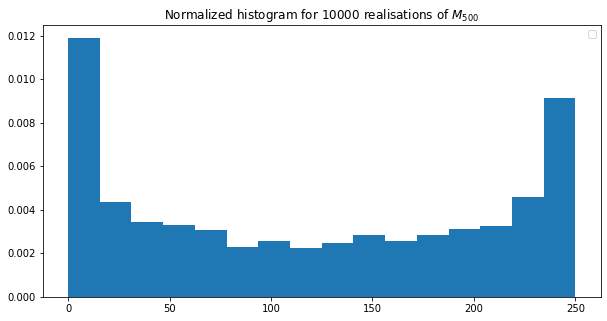

In [13]:
N = 250
M = 10000

c= sampleMaxTime(N,M)

plt.figure(figsize=(10,5))
plt.title("Normalized histogram for 10000 realisations of $M_{500}$")
plt.hist(c, bins='auto', density='True')
plt.legend()
plt.show()